In [1]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
# load training dataset
train = pd.read_csv('train_titanic.csv',index_col = 'PassengerId')

In [3]:
# define attributes and target variable
features = ['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']
target = ['Survived']
X = train [features]
y = train [target]

In [4]:
from sklearn import preprocessing

In [5]:
# Normalize attributes
zscore_scaler = preprocessing.StandardScaler().fit(X)
X_transform = pd.DataFrame(zscore_scaler.transform(X), columns = X.columns)

In [6]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1,0,1
2,1,38.0,1,0,71.2833,0,0,0
3,3,26.0,0,0,7.9250,0,0,1
4,1,35.0,1,0,53.1000,0,0,1
5,3,35.0,0,0,8.0500,1,0,1


In [7]:
X_transform.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306


In [8]:
# import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [9]:
# define model to be logistic regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# penalty='l1' means L1 regularization (recall LASSO regression); default is penality='L2' (L2 regularization). C=1.0 is inverse of regularization strength; must be a positive float.
# 'saga' is the algorithm to use in the optimization problem (finding the optimal coefficient values)
lr = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='saga')

In [10]:
# import cross validation and other evaluation tool 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
# change target column to array
yact = y.values.ravel()

In [12]:
score_cv = cross_val_score(lr, X_transform, yact, cv=10)

In [13]:
# accuracy from cross validation
score_cv.mean()

0.7946192259675405

In [14]:
#predict value of target based on cross validation
pred_y = cross_val_predict(lr, X_transform, yact, cv=10)

In [15]:
# Confusion matrix
print(confusion_matrix(y, pred_y))

[[469  80]
 [103 239]]


In [16]:
print(classification_report(yact, pred_y))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.75      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



### ROC

In [17]:
# probablities for each prediction
proba_y = cross_val_predict(lr, X_transform, yact, cv=10, method='predict_proba')

In [18]:
proba_y

array([[0.90383872, 0.09616128],
       [0.07386228, 0.92613772],
       [0.38423029, 0.61576971],
       ...,
       [0.50538202, 0.49461798],
       [0.41695825, 0.58304175],
       [0.88578243, 0.11421757]])

In [19]:
# probabilities of being '0' for all instances at default threshold of 0.5
proba_y_0 = proba_y[:,0]
proba_y_0

array([0.90383872, 0.07386228, 0.38423029, 0.09674271, 0.9263234 ,
       0.87998415, 0.72065533, 0.88404409, 0.47767433, 0.09465835,
       0.2759629 , 0.18518448, 0.87460769, 0.97647098, 0.28033079,
       0.38630605, 0.86975736, 0.76866383, 0.4793171 , 0.33366429,
       0.79841002, 0.79733545, 0.22548364, 0.49186857, 0.40540937,
       0.73811437, 0.87634869, 0.51183712, 0.34158843, 0.91082117,
       0.52280178, 0.04549201, 0.34166134, 0.93295403, 0.42580493,
       0.66679593, 0.87634755, 0.87885256, 0.40716438, 0.24961236,
       0.57251918, 0.20463991, 0.8761662 , 0.08564855, 0.25417042,
       0.91078974, 0.89955949, 0.34166134, 0.9135275 , 0.35596383,
       0.91673026, 0.87891932, 0.10809036, 0.21559447, 0.76185023,
       0.50855264, 0.14373489, 0.87115231, 0.13151654, 0.9493578 ,
       0.83968167, 0.05905482, 0.67537528, 0.90621341, 0.422296  ,
       0.91144604, 0.18688728, 0.87020536, 0.59791633, 0.93162545,
       0.78540292, 0.6171449 , 0.66979926, 0.88211197, 0.90822

In [20]:
# lower threshold for '0' to be 0.4
proba_y_0_lt= [0 if i >= 0.4 else 1 for i in proba_y_0]
proba_y_0_lt

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


In [21]:
print("Confusion Matrix:", '\n',confusion_matrix(y, proba_y_0_lt))
print("Accuracy:",accuracy_score(y, proba_y_0_lt, normalize=True, sample_weight=None))

Confusion Matrix: 
 [[503  46]
 [124 218]]
Accuracy: 0.8092031425364759


In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
# calculate tpr and fpr based on different thresholds
fpr, tpr, thresholds = metrics.roc_curve(yact,proba_y_0,pos_label=0)

In [24]:
metrics.auc(fpr, tpr)

0.8501209003078432

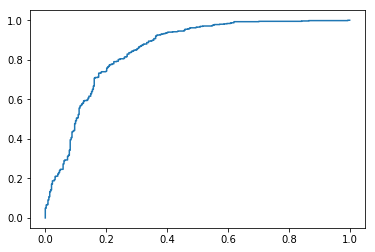

In [25]:
plt.plot(fpr,tpr)

In [26]:
# train model using training dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit
lr.fit(X_transform, yact)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# show the intercept of the trained model (Theta_0)
lr.intercept_

array([-0.64560104])

In [28]:
# show the coefficients of independent attributes
# the reason that we use the function .flatten() here is to convert the 8X1 array to 1X8 array
coeff_df = pd.DataFrame(lr.coef_.flatten(), X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Pclass,-0.910376
Age,-0.498802
SibSp,-0.343474
Parch,-0.065449
Fare,0.087607
Sex_male,-1.285060
Embarked_Q,0.000000
Embarked_S,-0.179448


In [34]:
lr1 = LogisticRegression(penalty='none', C=1.0, random_state=0, solver='saga')

In [35]:
lr1.fit(X_transform, yact)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
coeff_df = pd.DataFrame(lr1.coef_.flatten(), X.columns, columns=['Coefficient'])  

In [37]:
coeff_df

,Coefficient
Pclass,-0.920327
Age,-0.516214
SibSp,-0.359431
Parch,-0.075615
Fare,0.095732
Sex_male,-1.301682
Embarked_Q,-0.011757
Embarked_S,-0.190615
